### basic CMA-ES example

See https://github.com/RobertTLange/evosax

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

seed = 0
key = jax.random.key(seed)

from evosax.problems import BBOBProblem as Problem

num_dims = 2
fn_name = "rosenbrock"

problem = Problem(
    fn_name=fn_name,
    num_dims=num_dims,
    x_opt=2.5 * jnp.ones(num_dims),
    f_opt=0.0,
    sample_rotations=False,
    seed=seed,
)

key, subkey = jax.random.split(key)
problem_state = problem.init(subkey)

from evosax.algorithms import CMA_ES as ES

num_generations = 64
population_size = 16

# Instantiate evolution strategy
key, subkey = jax.random.split(key)
solution = problem.sample(subkey)
es = ES(
    population_size=population_size,
    solution=solution,  # requires a dummy solution
)

# Use default parameters
params = es.default_params

# Initialize evolution strategy
key, subkey = jax.random.split(key)
state = es.init(subkey, solution, params)


In [2]:
key, subkey = jax.random.split(key)
key_ask, key_eval, key_tell = jax.random.split(subkey, 3)

# Generate a set of candidate solutions to evaluate
population, state = es.ask(key_ask, state, params)

# Evaluate the fitness of the population
fitness, problem_state, info = problem.eval(key_eval, population, problem_state)

# Update the evolution strategy
state, metrics = es.tell(key_tell, population, fitness, state, params)

In [3]:
key, subkey = jax.random.split(key)
state = es.init(subkey, solution, params)

metrics_log = []
for i in range(num_generations):
    key, subkey = jax.random.split(key)
    key_ask, key_eval, key_tell = jax.random.split(subkey, 3)

    population, state = es.ask(key_ask, state, params)

    fitness, problem_state, info = problem.eval(key_eval, population, problem_state)

    state, metrics = es.tell(key_tell, population, fitness, state, params)

    # Log metrics
    metrics_log.append(metrics)

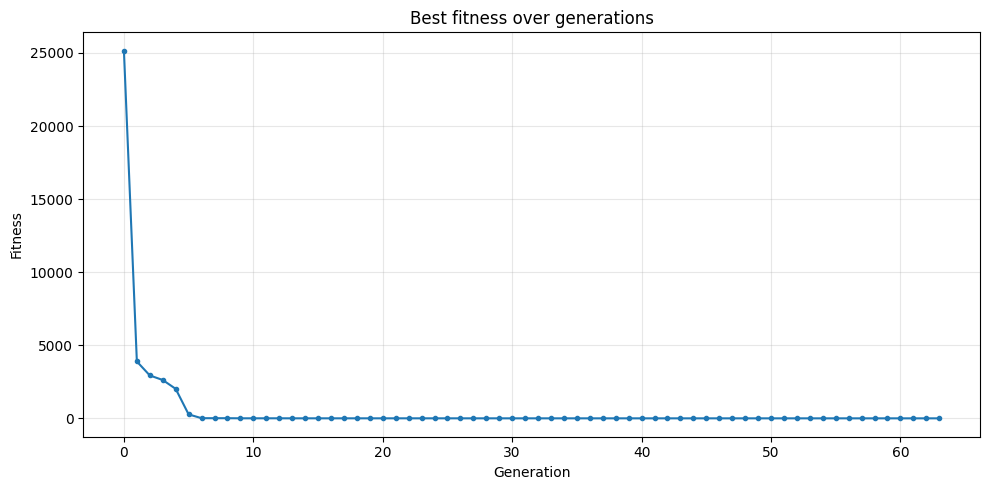

In [4]:
# Extract the best fitness values across generations
generations = [metrics["generation_counter"] for metrics in metrics_log]
best_fitness = [metrics["best_fitness"] for metrics in metrics_log]

plt.figure(figsize=(10, 5))
plt.plot(generations, best_fitness, label="Best Fitness", marker="o", markersize=3)

plt.title("Best fitness over generations")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()